# Import The Libraries

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import random
import math

# Rearrange the data creating our train and test arrays

In [ ]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images=train_images1[:5000,:]
# train_labels=train_labels1[:5000]
# test_images=test_images1[:500,:]
# test_labels=test_labels1[:500]

In [ ]:
#function to make the labeles as one hot vector
def label_reshape(arr_labele):
    label_vector=[]
    for i in range(len(arr_labele)):
        label_vector.append([0 for _ in range(10)])
        x = arr_labele[i]
        label_vector[i][x] = 1
    return label_vector  

In [ ]:
train_labels = label_reshape(train_labels)
test_labels = label_reshape(test_labels)

In [ ]:
train_labels[5]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#checking the arrays
train_images.shape , type(train_images) , test_images.shape , type(test_images)

((60000, 28, 28), numpy.ndarray, (10000, 28, 28), numpy.ndarray)

# Plotting numbers

In [ ]:
#function to plot the number
def plot_img(mnist_index):
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

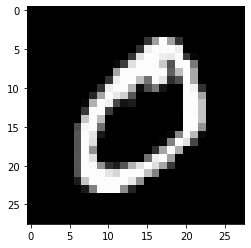

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#test the function
plot_img(train_images[1])
train_labels[1]

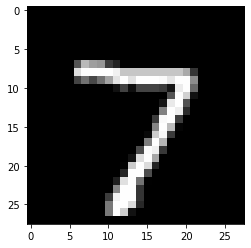

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
#test function
plot_img(test_images[0])
test_labels[0]

# ReShaping image to small images

In [ ]:
# this function return same input but divided in nGrid Images each image with dimensions row * col (return image as bloks)
def imaged_grid(img , row , col ):

    x , y = img.shape
    #check if the row and col is divisble by img shape
    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)
    
    return (img.reshape( x//row, row, -1, col).swapaxes(1,2).reshape(-1, row, col))

In [ ]:
#test function
print(imaged_grid(test_images[432] , 7 , 14 ).shape)
imaged_grid(test_images[432] , 7 , 14 )

(8, 7, 14)


array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238, 255,
          26,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 237, 254,
          26,   0]],

       [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0, 

# Feature extraction by the centroid

In [ ]:
# return feature vector for current image 
def get_centroid(img):
    feature_vector = []
    #for loop on the grids
    for grid in imaged_grid(img , 7 , 7 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
        #for loop in each grid
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
          #we normalize the centroid by dividing by 6
          feature_vector.append( (Xc/sum)/6 )
          feature_vector.append( (Yc/sum)/6 )
        else :
          #grid is empty
          feature_vector.append(0)
          feature_vector.append(0)
    
    return np.array(feature_vector)

In [ ]:
#test function
get_centroid(test_images[432])

array([0.        , 0.        , 0.91650579, 0.59861647, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.52230197, 0.58181663, 0.77949264, 0.14058897, 0.        ,
       0.        , 0.        , 0.        , 0.19479755, 0.75188324,
       0.43757019, 0.47118428, 0.39409142, 0.02591973, 0.        ,
       0.        , 0.        , 0.        , 0.20519037, 0.62221624,
       0.        , 0.        ])

# Creating test and train features 

In [ ]:
#create train feature
train_features = [get_centroid(img)  for img in train_images  ]


In [ ]:
train_features = np.array(train_features)

In [ ]:
train_features.shape
train_features[:2]

array([[0.        , 0.        , 0.99538259, 0.76759015, 0.95237072,
        0.52284773, 0.90722714, 0.12153392, 0.        , 0.        ,
        0.3202967 , 0.68394583, 0.26389366, 0.29288415, 0.        ,
        0.06842105, 0.        , 0.        , 0.87253788, 0.89393939,
        0.5414509 , 0.4341916 , 0.        , 0.        , 0.42677448,
        0.87915544, 0.2303024 , 0.47464974, 0.02380952, 0.10032103,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.87379715,
        0.46733064, 1.        , 0.        , 0.        , 0.        ,
        0.54656911, 0.63886179, 0.27626318, 0.56664243, 0.64426654,
        0.04892447, 0.59130146, 1.        , 0.52702483, 0.17403337,
        0.64201542, 0.61992028, 0.15041741, 0.05307096, 0.04129794,
        1.        , 0.14377555, 0.50471944, 0.03342554, 0.10511757,
        0.        , 0.        ]])

In [ ]:
#create test feature
test_features = [get_centroid(img)  for img in test_images  ]

In [ ]:
test_features = np.array(test_features)

In [ ]:
test_features[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1590706 , 1.        ,
       0.20332384, 0.48670465, 0.47831954, 0.61189345, 0.38080169,
       0.        , 0.        , 0.        , 0.98592593, 0.99777778,
       0.49502917, 0.34278202, 0.        , 0.        , 0.        ,
       0.        , 0.47806899, 0.82130956, 0.15115623, 0.02199662,
       0.        , 0.        ])

In [ ]:
class Layer:
  #every layer has its own input size, output size, weights and activation function
    def __init__(self, input_size, output_size , activation_function):
        self.input = None
        self.output = []
        self.weights = []
        self.activation_function = activation_function

        #nested loop to initailze the weigths with random values
        for i in range(input_size):
          col = []
          for j in range(output_size):
              col.append(random.random())
          self.weights.append(col)
        

    def forward_propagation(self, given_input  ):
        self.input = given_input
        self.output = []
        for col in range(len(self.weights[0])):
            sum = 0 
            for i in range(len(self.input) ):
                sum += self.input[i] * self.weights[i][col]
                
            if self.activation_function == "sigmoid" :
                self.output.append(1/ (1+ (math.exp(-sum)) ) )
            
            elif self.activation_function == "tanh" :
                self.output.append(math.tanh(sum))

        return self.output
        
        
    def back_propagation(self, previous_errors, learning_rate , targets):
        
        upcoming_error = []
        for i in range( len(self.input)):
            upcoming_error.append(0)

        
       #change the weights at the output layer
        if len(previous_errors) == 0 :
            for cur_neuron in range ( len(self.output) ) :
                delta_j = ( targets[cur_neuron] - self.output[cur_neuron] ) * self.output[cur_neuron]  * (1-self.output[cur_neuron])

                for upcoming_nueron in range( len( self.input) ) :
                    upcoming_error[upcoming_nueron] += delta_j * self.weights[upcoming_nueron][cur_neuron] 
                    self.weights[upcoming_nueron][cur_neuron] += ( delta_j * self.input[upcoming_nueron] * learning_rate)

      
        #change the weights at the hidden layer
        else :
                
            for cur_neuron in range ( len(self.output) ) :
                delta_j = previous_errors[cur_neuron] * self.output[cur_neuron]  * (1-self.output[cur_neuron]) 

                for upcoming_nueron in range( len ( self.input) ) :
                    
                    upcoming_error[upcoming_nueron] += delta_j * self.weights[upcoming_nueron][cur_neuron] 
                    self.weights[upcoming_nueron][cur_neuron] += delta_j * learning_rate * self.input[upcoming_nueron]
                    
                    
        return upcoming_error

In [ ]:
class Network:
  #every network has its own layers
    def __init__(self):
        self.layers = []

    #function to add a layer
    def add(self, layer ):
        self.layers.append(layer )

    #function to predict the output and return it as vector
    def predict(self, input_data):
        
        predicted = []
        for i in range(len(input_data)):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            predicted.append(output)

        return predicted

    #function to train the data
    def fit(self, train_data, train_labels, epochs, learning_rate):

        # loop for every epoch
        for epoch in range(epochs):
            #loop on the sampeles
            for sample in range(len(train_data)):
        
                cur_deltas = []
                
                output = train_data[sample]
                
                #forward propagation
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                #back propagation
                for layer in reversed(self.layers):
                    cur_deltas = layer.back_propagation(cur_deltas, learning_rate , train_labels[sample])

In [ ]:
NN = Network()
NN.add(Layer(32, 16 , "sigmoid"))
NN.add(Layer(16, 10 , "sigmoid"))
#train data
NN.fit(train_features, train_labels, epochs=100, learning_rate= 0.05)

In [ ]:
#test data
predicted_test = NN.predict(test_features)
predicted_train = NN.predict(train_features)
predicted_test

[[6.9309816966400315e-06,
  0.0009788248989016342,
  0.0020748653723981726,
  0.00011962872496274042,
  4.2096257905284725e-07,
  0.0013996980429111696,
  4.0922651320253325e-05,
  0.9988055113389663,
  0.00021070564764959159,
  0.0018867873101316877],
 [6.79225318195756e-05,
  0.0007425236997116249,
  0.9616203858207973,
  0.04405807454469578,
  8.933751760860231e-07,
  2.744920166004546e-06,
  0.13936963572432556,
  3.5910841024184974e-10,
  3.906076228474101e-09,
  8.617743343239312e-09],
 [9.673919744181708e-13,
  0.9997714112997169,
  0.00010802453545158255,
  0.0007338565062160569,
  0.0022018149007923837,
  0.006617926343457278,
  0.026106815906704293,
  7.561441623060297e-09,
  0.000547013717941884,
  5.65535899960977e-07],
 [0.9806704238229121,
  4.974073608961378e-09,
  0.007548954275143588,
  0.006654713172261537,
  4.210987954512493e-06,
  0.001882586861019525,
  0.08336648416139426,
  0.011677921358744415,
  0.002888550209298519,
  0.0006625780406527235],
 [2.4076081265848

In [ ]:
#function to calculate the accuracy and return it
def accuracy(predict,labels):
  predicted_num = []
  labels_num = []
  for i in predict:
    max_value = max(i)
    max_index = i.index(max_value)
    predicted_num.append(max_index)
  for j in labels:
    max_value = max(j)
    max_index = j.index(max_value)
    labels_num.append(max_index)
  right_labels = 0
  labels = len(predicted_num)
  for i in range(len(predicted_num)):
    if predicted_num[i]==labels_num[i]:
      right_labels=right_labels+1
  return(right_labels/labels)*100


In [ ]:
#print accuracy
print("Test Accuracy = {} %".format(accuracy(predicted_test,test_labels)))
print("Train Accuracy = {} %".format(accuracy(predicted_train,train_labels)))

Test Accuracy = 87.61 %
Train Accuracy = 87.42 %
